Regression tree

Importing libraries

In [306]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Read the Cars93 csv

In [307]:
cars = pd.read_csv('Cars93.csv')

Clean the cars data and get dummies

In [308]:
rowcleancars = cars.dropna()
ccars = rowcleancars.drop(columns=['Unnamed: 0'])
ccars = pd.get_dummies(ccars,drop_first=True)
ccars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 92
Columns: 225 entries, Min.Price to Make_Volvo 850
dtypes: float64(7), int64(11), uint8(207)
memory usage: 28.7 KB


Set up the testing and training data

In [309]:
X = ccars.drop(columns=['MPG.highway'])
y = ccars['MPG.highway']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Set up and train the regressor

In [310]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

Performing prediction and checking r squared

In [311]:
pred = regressor.predict(X_test)
print("R-squared: ",  regressor.score(X_test,y_test))

R-squared:  0.8179437894454142


[Text(0.6474358974358975, 0.9444444444444444, 'X[3] <= 24.5\nsquared_error = 23.077\nsamples = 38\nvalue = 29.852'),
 Text(0.41025641025641024, 0.8333333333333334, 'X[3] <= 21.5\nsquared_error = 3.271\nsamples = 30\nvalue = 27.75'),
 Text(0.24358974358974358, 0.7222222222222222, 'X[8] <= 18.25\nsquared_error = 1.748\nsamples = 19\nvalue = 26.897'),
 Text(0.1794871794871795, 0.6111111111111112, 'X[2] <= 35.6\nsquared_error = 1.238\nsamples = 13\nvalue = 27.611'),
 Text(0.1282051282051282, 0.5, 'X[173] <= 0.5\nsquared_error = 0.734\nsamples = 11\nvalue = 27.875'),
 Text(0.10256410256410256, 0.3888888888888889, 'X[23] <= 0.5\nsquared_error = 0.462\nsamples = 10\nvalue = 27.733'),
 Text(0.07692307692307693, 0.2777777777777778, 'X[134] <= 0.5\nsquared_error = 0.265\nsamples = 9\nvalue = 27.857'),
 Text(0.05128205128205128, 0.16666666666666666, 'X[8] <= 15.0\nsquared_error = 0.083\nsamples = 7\nvalue = 28.091'),
 Text(0.02564102564102564, 0.05555555555555555, 'squared_error = 0.0\nsamples = 

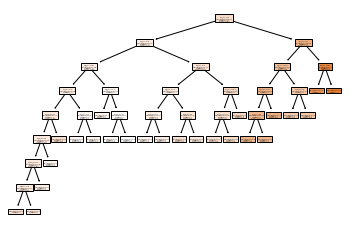

In [312]:
from sklearn import tree
tree.plot_tree(regressor.estimators_[0], filled = True)

Coefficient of determination of training: 
0.9576076970980196
Coefficient of determination of testing: 
0.8179437894454142


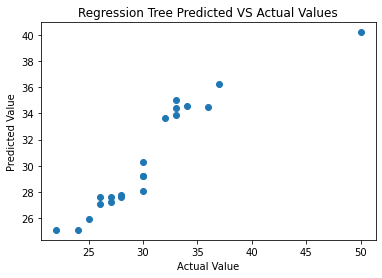

In [313]:
fig1, ax1 = plt.subplots()
ax1.scatter(y_test, pred)
ax1.set_xlabel('Actual Value')
ax1.set_ylabel('Predicted Value')
ax1.set_title('Regression Tree Predicted VS Actual Values')
print(f'Coefficient of determination of training: ')
print(regressor.score((X_train), (y_train)))
print('Coefficient of determination of testing: ')
print(regressor.score((X_test), (y_test)))

c:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted Value MPG Highway')

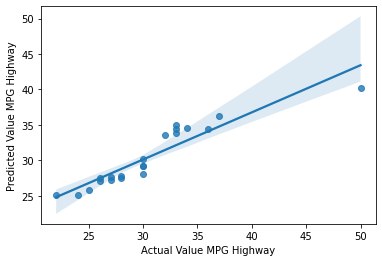

In [314]:
import seaborn as sns

g = sns.regplot(y_test,pred)
g.set_xlabel("Actual Value MPG Highway")
g.set_ylabel("Predicted Value MPG Highway")


In [315]:
importances = list(regressor.feature_importances_)
cols = list(X.columns)
d = {'importances':importances,'cols':cols}
df = pd.DataFrame(d)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(df)


,importances,cols
0,0.028001,Min.Price
1,0.007638,Price
2,0.009236,Max.Price
3,0.726298,MPG.city
4,0.004743,EngineSize
5,0.023451,Horsepower
6,0.008854,RPM
7,0.017956,Rev.per.mile
8,0.012287,Fuel.tank.capacity
9,0.003776,Passengers
